In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from ipywidgets import interact

Importacion de librerias a usar y archivos csv 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#demografia_data = pd.read_csv("/content/drive/My Drive/Datasets/NHANES datasets/demographic_final.csv")
#presion_sanguinea_data = pd.read_csv("/content/drive/My Drive/Datasets/NHANES datasets/examination_blood_preasure.csv")
#medidas_corporales_data = pd.read_csv("/content/drive/My Drive/Datasets/NHANES datasets/examination_body_measures.csv")
#resultados_laboratorio_data = pd.read_csv("/content/drive/My Drive/Datasets/NHANES datasets/laboratory_results.csv")

demografia_data = pd.read_csv("/content/drive/My Drive/Proyecto 04/demographic_final.csv")
presion_sanguinea_data = pd.read_csv("/content/drive/My Drive/Proyecto 04/examination_blood_preasure.csv")
medidas_corporales_data = pd.read_csv("/content/drive/My Drive/Proyecto 04/examination_body_measures.csv")
resultados_laboratorio_data = pd.read_csv("/content/drive/My Drive/Proyecto 04/laboratory_results.csv")

# 1) Identificar la presencia de datos nulos y outliers estableciendo una normativa para el tratamiento de dicha información tomando en consideración los documentos oficiales de NHANES. 


1.1-Funcion para detectar cantidad y porcentajes de datos nulos por cada DataSets

In [0]:
#Funcion para determinar porcentajes de datos nulos o vacios por columnas
def porcent_de_nulos_y_outliers(df):
  sumanulos=df.isnull().sum()    #suma todos los nulos para contar cuantos son
  porcentajes_nulos_columnas=((sumanulos/len(df))*100).round() #entrega el porcentaje de nulos o vacios
  print('\nEl porcentajde nulos o vacios del y Outliers dataset por columnas es:')

  nom_columnas = df.columns.to_list()     #crea una lista con el nombre de las columnas del dataframe
  outliers=df.apply((lambda x: (x<(x.mean()-x.std()*3)) | (x>(x.mean()+x.std()*3)))).sum()  #Busca los datos que salen de un margen de seleccion y los agrega a una variable 
  
  #Se crea un Dataframe para mostrar 'nombre de las columnas'  total nulos porcentaje de nulos y cantidad de datos que se escapan del marco de seleccion
  data_datos = pd.DataFrame({'Nombre columnas':nom_columnas,'Total nulos':sumanulos,'% Nulos por Columna':porcentajes_nulos_columnas,'Cantidad outliers':outliers}).reset_index(drop=True)
  return data_datos

Para tener una idea de la cantidad de datos que estan fuera de los parametros(Outliers), se utilizo como referencia la **(media+3*desviacion estandar)**

1.2-Menu para escoger un datasets

In [0]:
#Menu para escoger entre los datasets
op=int(input('Escoja datasets a mostrar: \n1-demografia_data\n2-presion_sanguinea_data\n3-medidas_corporales_data\n4-resultados_laboratorio_data\n'))
listmenu=pd.Series([demografia_data,presion_sanguinea_data,medidas_corporales_data,resultados_laboratorio_data], index=[1,2,3,4])
porcent_de_nulos_y_outliers(listmenu[op])

Escoja datasets a mostrar: 
1-demografia_data
2-presion_sanguinea_data
3-medidas_corporales_data
4-resultados_laboratorio_data
3

El porcentajde nulos o vacios del y Outliers dataset por columnas es:


,Nombre columnas,Total nulos,% Nulos por Columna,Cantidad outliers
0,SEQN,0,0.0,0
1,BMDSTATS,0,0.0,493
2,BMXWT,90,1.0,45
3,BMXRECUM,8748,89.0,0
4,BMXHEAD,9584,98.0,1
5,BMXHT,746,8.0,38
6,BMXBMI,758,8.0,101
7,BMDBMIC,6290,64.0,0
8,BMXLEG,2411,25.0,10
9,BMXARML,512,5.0,11


# 2) Realice un estudio de las características demográficas de la encuesta determinando los valores predominantes en cada una de ellas. 


In [0]:
demografia_data.describe()


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,DMDHHSIZ,INDHHIN2
count,10175.000000,10175.0,10175.000000,10175.000000,10175.000000,673.000000,10175.000000,10175.000000,9813.000000,4213.000000,6261.000000,543.000000,10175.000000,10171.000000,1908.000000,2803.000000,5769.000000,5769.000000,1309.000000,10175.000000,10175.000000,10042.000000
mean,78644.000000,8.0,1.964423,1.508305,31.484128,10.341753,3.091892,3.289828,1.508509,107.478519,1.914071,1.493554,1.227027,1.097532,8.837526,6.162326,3.518807,2.571850,2.022154,1.105651,3.874693,10.884983
std,2937.413829,0.0,0.185243,0.499956,24.421651,6.885479,1.263305,1.613241,0.499953,69.774776,0.288704,0.594761,1.830533,0.341097,17.593642,5.861571,1.236032,2.626299,0.347949,0.307406,1.722184,13.878864
min,73557.000000,8.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,76100.500000,8.0,2.000000,1.000000,10.000000,5.000000,2.000000,2.000000,1.000000,45.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,5.000000
50%,78644.000000,8.0,2.000000,2.000000,26.000000,9.000000,3.000000,3.000000,2.000000,103.000000,2.000000,1.000000,1.000000,1.000000,5.000000,5.000000,4.000000,1.000000,2.000000,1.000000,4.000000,8.000000
75%,81187.500000,8.0,2.000000,2.000000,52.000000,16.000000,4.000000,4.000000,2.000000,166.000000,2.000000,2.000000,1.000000,1.000000,7.000000,9.000000,5.000000,5.000000,2.000000,1.000000,5.000000,14.000000
max,83731.000000,8.0,2.000000,2.000000,80.000000,24.000000,5.000000,7.000000,2.000000,239.000000,7.000000,9.000000,99.000000,9.000000,99.000000,99.000000,9.000000,99.000000,3.000000,2.000000,7.000000,99.000000


# 3) Utilice el nivel educacional de los encuestados para generar un perfil demográfico de  las personas en base a dicha característica. Como mínimo el perfil debe considerar: 
1. Sexo
2. Edad
3. Estado civil
4. Participación del entrevistado
5. Ciudadano de US
6. Cantidad de personas en el hogar
7. Ingreso anual del hogar

Para poder realizar dicho perfil debe considerar la distribución de los datos para determinar qué medidas estadísticas utilizará. 



In [0]:
datacolum_need=demografia_data[['SEQN','RIAGENDR','RIDAGEYR','DMDMARTL','DMDCITZN','DMDHHSIZ','INDHHIN2','DMDEDUC3','DMDEDUC2']]
datacolum_need.columns=['SEQN','Sexo','Edad','Estado civil','Ciudadano US','Cant per Hogar','Ing Anual Hogar','Niv educ Niños','Niv educ Adultos']
educ_niños=datacolum_need[datacolum_need['Niv educ Niños']==datacolum_need['Niv educ Niños']].drop(columns=['Niv educ Adultos','Estado civil'])
educ_adultos=datacolum_need[datacolum_need['Niv educ Adultos']==datacolum_need['Niv educ Adultos']].drop(columns=['Niv educ Niños'])

Para el datasets niños se elimino la columna estado civil ya que no era necesaria

In [0]:
display(educ_niños.head(),educ_adultos.head())

,SEQN,Sexo,Edad,Ciudadano US,Cant per Hogar,Ing Anual Hogar,Niv educ Niños
3,73560,1,9,1.0,4,9.0,3.0
13,73570,2,9,1.0,4,5.0,2.0
15,73572,2,10,1.0,3,2.0,3.0
16,73573,1,10,1.0,5,8.0,4.0
19,73576,1,16,1.0,6,8.0,9.0


,SEQN,Sexo,Edad,Estado civil,Ciudadano US,Cant per Hogar,Ing Anual Hogar,Niv educ Adultos
0,73557,1,69,4.0,1.0,3,4.0,3.0
1,73558,1,54,1.0,1.0,4,7.0,3.0
2,73559,1,72,1.0,1.0,2,10.0,4.0
4,73561,2,73,1.0,1.0,2,15.0,5.0
5,73562,1,56,3.0,1.0,1,9.0,4.0


In [0]:
educ_niños.head()

,SEQN,Sexo,Edad,Ciudadano US,Cant per Hogar,Ing Anual Hogar,Niv educ Niños
3,73560,1,9,1.0,4,9.0,3.0
13,73570,2,9,1.0,4,5.0,2.0
15,73572,2,10,1.0,3,2.0,3.0
16,73573,1,10,1.0,5,8.0,4.0
19,73576,1,16,1.0,6,8.0,9.0


# 4) Estudie las distribuciones de frecuencia de: 
1. Peso.
2. Altura.
3. Índice de masa corporal. 
4. Circunferencia de la cabeza.
5. Presión sistólica.
6. Presión diastólica.
7. Triglicéridos.
8. Colesterol total. 
9. Insulina.

Genere una tabla de frecuencia por rangos para cada una de estas distribuciones y grafique utilizando histogramas. 



4.1-se obtienen las columnas necesarias de cada datasets y se programa una Funcion para graficar las distribuciones de frecuencia


In [0]:
body=medidas_corporales_data[['BMXWT','BMXHT','BMXBMI','BMXHEAD']]
blood=presion_sanguinea_data[['BPXSY3','BPXDI3']]
labo=resultados_laboratorio_data[['LBXTR','LBXTC','LBXIN']]
new_base=pd.concat([body,blood,labo],axis=1)
new_base.columns=['Peso','Altura','IMC','Circunferencia cabeza','Presion Sistolica','Presion Diastolica','Trigliceridos','Colesterol Total','Insulina']

In [0]:
def graficar_d_frecuencia(col):
  t=0
  if col == 'Peso':
    t=6
    data_copy=new_base
    data_copy=pd.cut(new_base[col],t,precision=0)
    grafico=data_copy.value_counts().sort_values().plot(kind='barh',color='Red', figsize=(15,7))
    plt.text
    plt.title(f'Grafico de {col}',fontdict = {'fontsize' : 20})
    grafico;
  elif col == 'Altura':
    t=5
    data_copy=new_base
    data_copy=pd.cut(new_base[col],t,precision=0)
    grafico=data_copy.value_counts().sort_values().plot(kind='barh',color='Red', figsize=(15,7))
    plt.title(f'Grafico de {col}',fontdict = {'fontsize' : 20})
  elif col == 'IMC':
    t=4
    data_copy=new_base
    data_copy=pd.cut(new_base[col],t,precision=0)
    grafico=data_copy.value_counts().sort_values().plot(kind='barh',color='Red', figsize=(15,7))
    plt.title(f'Grafico de {col}',fontdict = {'fontsize' : 20})
  elif col == 'Circunferencia cabeza':
    t=5
    data_copy=new_base
    data_copy=pd.cut(new_base[col],t,precision=0)
    grafico=data_copy.value_counts().sort_values().plot(kind='barh',color='Red', figsize=(15,7))
    plt.title(f'Grafico de {col}',fontdict = {'fontsize' : 20})
  elif col == 'Presion Sistolica':
    t=3
    data_copy=new_base
    data_copy=pd.cut(new_base[col],t,precision=0)
    grafico=data_copy.value_counts().sort_values().plot(kind='barh',color='Red', figsize=(15,7))
    plt.title(f'Grafico de {col}',fontdict = {'fontsize' : 20})
  elif col == 'Presion Diastolica':
    t=3
    data_copy=new_base
    data_copy=pd.cut(new_base[col],t,precision=0)
    grafico=data_copy.value_counts().sort_values().plot(kind='barh',color='Red', figsize=(15,7))
    plt.title(f'Grafico de {col}',fontdict = {'fontsize' : 20})
  elif col == 'Trigliceridos':
    t=2
    data_copy=new_base
    data_copy=pd.cut(new_base[col],t,precision=0)
    grafico=data_copy.value_counts().sort_values().plot(kind='barh',color='Red', figsize=(15,7))
    plt.title(f'Grafico de {col}',fontdict = {'fontsize' : 20})
  elif col == 'Colesterol Total':
    t=5
    data_copy=new_base
    data_copy=pd.cut(new_base[col],t,precision=0)
    grafico=data_copy.value_counts().sort_values().plot(kind='barh',color='Red', figsize=(15,7))
    plt.title(f'Grafico de {col}',fontdict = {'fontsize' : 20})
  elif col == 'Insulina':
    t=5
    data_copy=new_base
    data_copy=pd.cut(new_base[col],t,precision=0)
    grafico=data_copy.value_counts().sort_values().plot(kind='barh',color='Red', figsize=(15,7))
    plt.title(f'Grafico de {col}',fontdict = {'fontsize' : 20})
  

4.2-Menu para escoger la medida a graficar


Elija Medida a graficar :
1-Peso
2-Altura
3-IMC
4-Circunferencia cabeza
5-Presion Sistolica
6-Presion Diastolica
7-Trigliceridos
8-Colesterol Total
9-Insulina
1


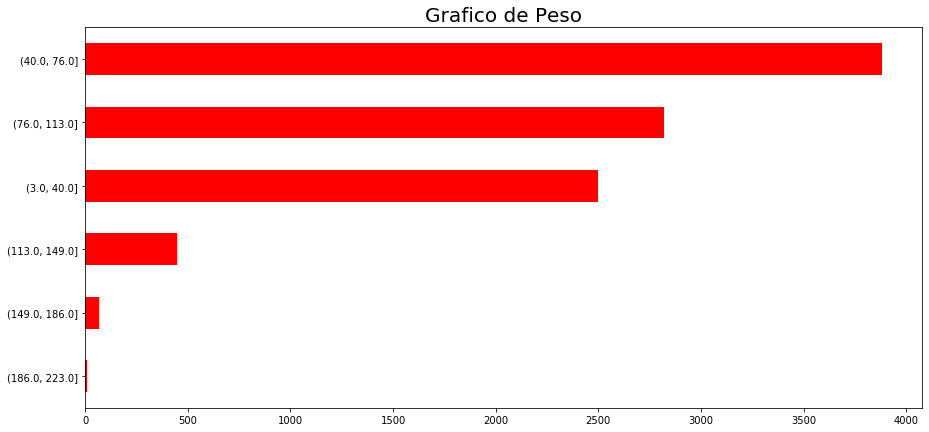

In [0]:
#menu para graficar distintos datasets y columnas
op=int(input('Elija Medida a graficar :\n1-Peso\n2-Altura\n3-IMC\n4-Circunferencia cabeza\n5-Presion Sistolica\n6-Presion Diastolica\n7-Trigliceridos\n8-Colesterol Total\n9-Insulina\n'))
lista_data=pd.Series(['Peso','Altura','IMC','Circunferencia cabeza','Presion Sistolica','Presion Diastolica','Trigliceridos','Colesterol Total','Insulina'], index=[1,2,3,4,5,6,7,8,9])
graficar_d_frecuencia(lista_data[op]);

Tambien podemos graficar todo de una vez usando un ciclo for

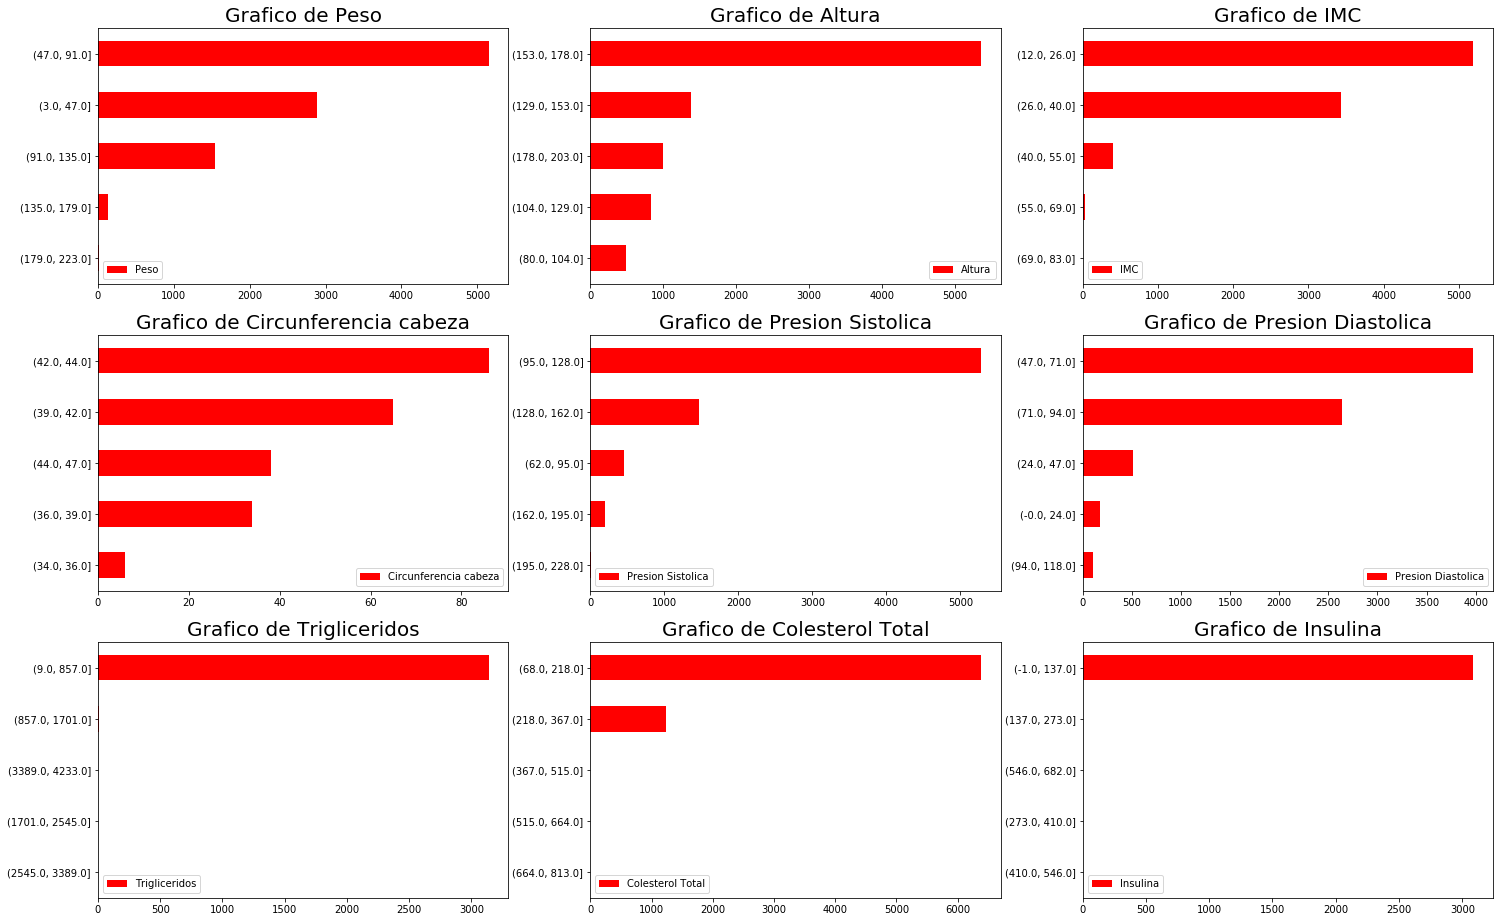

In [0]:
data_copy=new_base
for index, values in enumerate(data_copy):

  plt.subplot(3,3,index+1)
  data_copy=pd.cut(new_base[values],5,precision=0)
  grafico=data_copy.value_counts().sort_values().plot(kind='barh',color='Red',legend='Reverse', figsize=(25,16))
  plt.title(f'Grafico de {values}',fontdict = {'fontsize' : 20})
  grafico

# 5) Identifique cuales son las características que más influyen en que una persona tenga presión alta o baja. Compruebe lo anterior mediante una matriz de correlación. Realice el análisis tanto para la presión sistólica como diastólica. 


Unimos los datasets necesarios para realizar las operaciones mediante la sentencia merge y la columna que 'SEQN' que tienen en comun, despues obtenemos la media de la presion sistolica y diastolica, obtenemos de las columnas necesarias para realizar las operaciones y comparaciones, cambiamos los nombres de las columnas para identificarlas mejor.

In [0]:
all_datasets=demografia_data.merge(medidas_corporales_data, on='SEQN').merge(presion_sanguinea_data,on='SEQN').merge(resultados_laboratorio_data,on='SEQN')
all_datasets['BPXSYM']=all_datasets[['BPXSY1','BPXSY2','BPXSY3']].mean(1)
all_datasets['BPXDIM']=all_datasets[['BPXDI1','BPXDI2','BPXDI3']].mean(1)
col_want=all_datasets[['RIDAGEYR','BMXWT','BMXHT','BMXBMI', 'BMXWAIST', 'LBDHDD', 'LBXTR', 'LBDLDL','LBXTC', 'LBXIN','BPXSYM','BPXDIM']]
col_want.columns=['Edad','Peso','Altura','IMC','Circ_Cintura','Colesterol_Bueno','Trigliceridos','Colesterol_Malo','Colesterol_Total','Insulina','P_Sistolica','P_Diastolica']

Las caracteristicas que influyen en que una persona tenga Presion alta o baja pueden ser:
* Edad

 ![Edad](https://s3-eu-west-1.amazonaws.com/enciclopediasalud/nivelestension.jpg)![texto alternativo](https://www.ministros.org/wp-content/uploads/2018/10/rangos-presion-arterial.png)


* Tener sobre peso u obesidad. Indice de masa corporal(IMC) sobre los 30 en un adulto es considerado obeso.

![IMC](https://artricenter.files.wordpress.com/2012/09/imc-tabla.png)
* Ciertas enfermedades crónicas también pueden aumentar tu riesgo de presión arterial alta, como la enfermedad renal, la **diabetes** y la apnea del sueño. Por ello consideraremos la **Insulina** como otro medidor.


Fuentes de informacion
  - [Presion Arterial](https://medlineplus.gov/spanish/ency/article/000468.htm)
  - [Indice de masa Corporal](https://medlineplus.gov/spanish/ency/article/003101.htm)

  - [Insulina](https://www.mayoclinic.org/es-es/diseases-conditions/prediabetes/diagnosis-treatment/drc-20355284)

Considerando todo lo anterior, haremos un filtro con **Edad**(>=60 años), **IMC**(>=30), **Presion Sistolica**(>=130), **Insulina**(>=140)

In [0]:
filtro_col=col_want[(col_want['Edad']>=60)&(col_want['IMC']>=30)&(col_want['P_Sistolica']>=130)&(col_want['Insulina']>=140)]
filtro_col

,Edad,Peso,Altura,IMC,Circ_Cintura,Colesterol_Bueno,Trigliceridos,Colesterol_Malo,Colesterol_Total,Insulina,P_Sistolica,P_Diastolica
8167,68,129.7,177.9,41.0,135.2,54.0,95.0,59.0,132.0,203.27,158.666667,74.666667


Se puede observar que al realizar este filtro, nos encontramos con una persona que es claro que sufre de presion alta debido a, por ejemplo: El peso, el cual va de la mano con el IMC. Vemos como su nivel de insulina esta sobre los 200 y se puede observar que la presion arterial esta fuera de los rangos normales, ya que la P.sistolica esta sobre los 130 y la P.diastolica bajo los 80.
Para obtener otros resultados dejaremos solo el filtro de IMC (>=30). El peso no debe ser considerado un factor veraz de medicion, ya que un atleta puede tener un mayor peso por la musculatura pero no un IMC alto. Veremos si en el resultado los niveles de la presion siguen dentro de los parametros.

In [0]:
filtro_col=col_want[(col_want['IMC']>=30)]
filtro_col.head()

,Edad,Peso,Altura,IMC,Circ_Cintura,Colesterol_Bueno,Trigliceridos,Colesterol_Malo,Colesterol_Total,Insulina,P_Sistolica,P_Diastolica
5,56,105.0,158.7,41.7,123.1,38.0,NaN,NaN,226.0,NaN,157.333333,82.000000
7,61,93.4,161.8,35.7,110.8,58.0,64.0,97.0,168.0,14.91,122.666667,80.666667
12,76,102.4,172.5,34.4,122.1,50.0,NaN,NaN,167.0,NaN,126.000000,68.000000
19,18,109.4,175.2,35.6,110.2,NaN,NaN,NaN,NaN,NaN,122.666667,64.000000
21,38,93.5,161.4,35.9,107.4,55.0,57.0,159.0,225.0,10.92,121.000000,75.000000


Usaremos como filtro solo la presion sistolica (>=130) y asi observar la correlacion entre las columnas.

In [0]:
psis=col_want[(col_want['P_Sistolica']>=130)]
psis.corr(method='pearson').round(3).style.background_gradient(cmap='YlOrBr')

,Edad,Peso,Altura,IMC,Circ_Cintura,Colesterol_Bueno,Trigliceridos,Colesterol_Malo,Colesterol_Total,Insulina,P_Sistolica,P_Diastolica
Edad,1,-0.35,-0.294,-0.253,-0.129,0.166,-0.094,-0.02,-0.002,-0.143,0.285,-0.291
Peso,-0.35,1,0.478,0.895,0.902,-0.319,0.09,-0.03,-0.091,0.452,-0.148,0.127
Altura,-0.294,0.478,1,0.05,0.227,-0.199,0.03,-0.056,-0.116,0.137,-0.143,0.15
IMC,-0.253,0.895,0.05,1,0.91,-0.262,0.081,-0.012,-0.051,0.428,-0.108,0.07
Circ_Cintura,-0.129,0.902,0.227,0.91,1,-0.342,0.106,-0.041,-0.075,0.464,-0.067,0.05
Colesterol_Bueno,0.166,-0.319,-0.199,-0.262,-0.342,1,-0.412,0.016,0.188,-0.274,0.074,-0.071
Trigliceridos,-0.094,0.09,0.03,0.081,0.106,-0.412,1,0.099,0.287,0.159,0.039,0.132
Colesterol_Malo,-0.02,-0.03,-0.056,-0.012,-0.041,0.016,0.099,1,0.908,-0.082,0.042,0.078
Colesterol_Total,-0.002,-0.091,-0.116,-0.051,-0.075,0.188,0.287,0.908,1,-0.105,0.087,0.127
Insulina,-0.143,0.452,0.137,0.428,0.464,-0.274,0.159,-0.082,-0.105,1,-0.041,0.035


Al observar la matriz de correlacion anterior, nos damos cuenta que una persona con una pesion arterial igual o mayor a los 130, resalta una *correlacion Alta* en las columnas: **IMC**, **Circ_cintura**, **Colesterol_Malo** y **Colesterol_Total**.

# 6) Realice un análisis estadístico determinando las medidas de tendencia central y dispersión para los resultados de las pruebas de laboratorio. 


In [0]:
#Realizar calculos de la media, moda, mediana, desviacion standar, rango y varianza para laboratorio
media=resultados_laboratorio_data.mean()
moda=resultados_laboratorio_data.mode().T
mediana=resultados_laboratorio_data.median()
desviacionS=resultados_laboratorio_data.std()
varianza=resultados_laboratorio_data.var().round(3)
central_trend=pd.DataFrame({'Media':media,'Moda':moda[0],'Mediana':mediana,'Des Standar':desviacionS,'Varianza':varianza}, index=media.index)
central_trend.rename(index={'LBXHA':'Hepatitis A','URXUCL':'Clamidia','LBDHDD':'Colesterol_HDL','LBXTR':'Trigliceridos','LBDLDL':'Colesterol_LDL','LBXTC':'Colesterol_TOTAL','URXUMS':'Albumina','URXUCR':'Creatinina','LBXHBC':'Hepatitis B','LBXIN':'Insulina','URXPREG':'Orina_Emb','LBXSCA':'Total_Calcio'},inplace = True)
print('Medidas de Tendencia Central y Dispersion de las pruebas de laboratorio')
central_trend.drop('SEQN')

Medidas de Tendencia Central y Dispersion de las pruebas de laboratorio


,Media,Moda,Mediana,Des Standar,Varianza
Hepatitis A,1.417836,1.00,1.00,0.493233,0.243
Clamidia,1.972861,2.00,2.00,0.162526,0.026
Colesterol_HDL,53.105194,48.00,51.00,15.230838,231.978
Trigliceridos,112.306739,56.00,88.00,115.607060,13364.992
Colesterol_LDL,106.221256,92.00,103.00,34.988663,1224.207
Colesterol_TOTAL,179.534103,160.00,175.00,40.954000,1677.230
Albumina,41.218854,4.20,8.40,238.910226,57078.096
Creatinina,127.578439,103.00,112.00,81.982279,6721.094
Hepatitis B,1.942921,2.00,2.00,0.232009,0.054
Insulina,13.526809,6.61,9.47,18.638388,347.389


# 7) Realice un filtro por sexo para niños menores de 2 años e indique aquellas características que permiten diferenciar de mejor manera a que sexo corresponde. Estudie la correlación y covarianza entre dichas características.


7.1-Se realiza un filtro por columna __'Edad'__ menores de 2 años y por la columna __'Edad en meses'__ de los que tienen hasta 24 meses

In [0]:
filtro=demografia_data[(demografia_data['RIDAGEYR']<=2)& demografia_data['RIDAGEMN']].merge(medidas_corporales_data, on='SEQN')
filtro_col=filtro[['SEQN','RIAGENDR', 'RIDAGEYR', 'RIDAGEMN','BMXHEAD', 'BMXWT','BMXRECUM']]
filtro_col.columns=['SEQN','Genero','Edad','Edad en meses','Circ Cabeza','Peso','Long Reclinada']
filtro_col.head()

,SEQN,Genero,Edad,Edad en meses,Circ Cabeza,Peso,Long Reclinada
0,73563,1,0,5.0,43.7,7.4,68.0
1,73575,1,1,18.0,NaN,9.4,80.0
2,73636,2,1,23.0,NaN,13.1,93.1
3,73679,2,1,23.0,NaN,13.2,86.1
4,73685,2,0,1.0,36.8,3.8,50.9


7.2-Agrupamos por Genero para observar diferencias entre ellos

In [0]:
fil=filtro_col.groupby(['Genero']).mean().loc[:,['Edad','Edad en meses','Circ Cabeza','Peso','Long Reclinada']].round()
print('Se puede observar con la media de los datos, que se evidencia una diferencia entre los generos')
fil.reset_index()

Se puede observar con la media de los datos, que se evidencia una diferencia entre los generos


,Genero,Edad,Edad en meses,Circ Cabeza,Peso,Long Reclinada
0,1,0.0,11.0,43.0,10.0,75.0
1,2,0.0,10.0,41.0,9.0,71.0


Correlacion

In [0]:
filtro_col.corr(method='pearson').round(3).style.background_gradient(cmap='YlOrBr')

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,SEQN,Genero,Edad,Edad en meses,Circ Cabeza,Peso,Long Reclinada
SEQN,1,-0.001,0.037,-0.011,0.016,-0.026,-0.032
Genero,-0.001,1,-0.068,-0.079,-0.303,-0.196,-0.182
Edad,0.037,-0.068,1,0.87,nan,0.689,0.799
Edad en meses,-0.011,-0.079,0.87,1,0.751,0.827,0.935
Circ Cabeza,0.016,-0.303,nan,0.751,1,0.83,0.841
Peso,-0.026,-0.196,0.689,0.827,0.83,1,0.922
Long Reclinada,-0.032,-0.182,0.799,0.935,0.841,0.922,1


Covarianza

In [0]:
filtro_col.cov().round(3).style.background_gradient(cmap='YlOrBr')

,SEQN,Genero,Edad,Edad en meses,Circ Cabeza,Peso,Long Reclinada
SEQN,8.97159e+06,-1.038,57.198,-222.679,109.369,-187.734,-877.907
Genero,-1.038,0.25,-0.017,-0.259,-0.341,-0.24,-0.836
Edad,57.198,-0.017,0.263,2.947,0,0.863,3.759
Edad en meses,-222.679,-0.259,2.947,43.54,3.055,13.283,56.353
Circ Cabeza,109.369,-0.341,0,3.055,5.071,2.505,8.604
Peso,-187.734,-0.24,0.863,13.283,2.505,5.959,20.629
Long Reclinada,-877.907,-0.836,3.759,56.353,8.604,20.629,84.101


# 8) En base al perfil demográfico realizado en (3), calcule la probabilidad que una persona perteneciente a cada una de dichas agrupaciones padezca:
1. Hepatitis A.
2. Hepatitis B.
3. Clamidia.


8.a-Se calculan probabilidades y se muestran en pantalla

In [0]:
habc_niños=educ_niños.merge(resultados_laboratorio_data, on='SEQN')
habc_adultos=educ_adultos.merge(resultados_laboratorio_data, on='SEQN')
ha_ns=round(len(habc_niños[(habc_niños['LBXHA']==1)])/len(demografia_data)*100,2)
ha_ad=round(len(habc_adultos[(habc_adultos['LBXHA']==1)])/len(demografia_data)*100,2)
hb_ns=round(len(habc_niños[(habc_niños['LBXHBC']==1)])/len(demografia_data)*100,2)
hb_ad=round(len(habc_adultos[(habc_adultos['LBXHBC']==1)])/len(demografia_data)*100,2)
clam_ns=round(len(habc_niños[(habc_niños['URXUCL']==1)])/len(demografia_data)*100,2)
clam_ad=round(len(habc_adultos[(habc_adultos['URXUCL']==1)])/len(demografia_data)*100,2)
print(f'Estas son las probabilidades de que del total de la muestra, padezcan las siguientes enfermedades:\n-{ha_ns}%\t:Niños con Hapatitis A \n-{ha_ad}%\t:Adutos con Hepatitis A \n-{hb_ns}%\t:Niños con Hepatitis B \n-{hb_ad}%\t:Adultos con Hepatitis B\n-{clam_ns}%\t:Niños con Clamidia\n-{clam_ad}%\t:Adultos con Clamidia')

Estas son las probabilidades de que del total de la muestra, padezcan las siguientes enfermedades:
-17.5%	:Niños con Hapatitis A 
-24.25%	:Adutos con Hepatitis A 
-0.07%	:Niños con Hepatitis B 
-4.23%	:Adultos con Hepatitis B
-0.18%	:Niños con Clamidia
-0.4%	:Adultos con Clamidia


8.b-Se muestran las probabilidades mediante un Dataframe

In [0]:
data_exam=pd.DataFrame({'Hepatitis A':[ha_ns,ha_ad],'Hepatitis B':[hb_ns,hb_ad],'Clamidia':[clam_ns,clam_ad]},index=['Niños','Adultos'])
data_exam

,Hepatitis A,Hepatitis B,Clamidia
Niños,17.50,0.07,0.18
Adultos,24.25,4.23,0.40


# 9) Realice un filtro para aquellas mujeres en estado de embarazo al momento de la encuesta y determine las principales características fisicas y fisiologicas que poseen. 


In [0]:
all_data=demografia_data.merge(medidas_corporales_data,on='SEQN').merge(presion_sanguinea_data,on='SEQN').merge(resultados_laboratorio_data,on='SEQN')
preg_data=all_data[['RIDEXPRG','BMXWT','BMXHT','BMXBMI','BMXWAIST','BPXPULS','LBXTC','LBXIN','LBXSCA']]
preg_data[preg_data['RIDEXPRG']==1].describe()

,RIDEXPRG,BMXWT,BMXHT,BMXBMI,BMXWAIST,BPXPULS,LBXTC,LBXIN,LBXSCA
count,65.0,65.000000,65.000000,65.000000,60.000000,59.0,61.000000,21.000000,60.000000
mean,1.0,75.566154,162.581538,28.575385,98.351667,1.0,203.557377,12.492857,9.166667
std,0.0,19.146208,6.790271,6.983575,16.461774,0.0,49.659683,17.137033,0.343297
min,1.0,46.700000,145.100000,18.500000,67.100000,1.0,87.000000,2.430000,8.400000
25%,1.0,61.300000,157.800000,23.800000,87.250000,1.0,160.000000,5.570000,8.900000
50%,1.0,74.300000,162.800000,27.100000,97.600000,1.0,204.000000,7.800000,9.150000
75%,1.0,86.000000,167.700000,31.500000,106.725000,1.0,238.000000,9.800000,9.400000
max,1.0,140.600000,176.500000,49.600000,145.200000,1.0,331.000000,76.970000,10.000000



# 10) Estudie la relación existente entre el peso y la altura, colesterol e insulina, edad y presión arterial. Realice gráficos de dispersión para visualizar la relación. Aplique un logaritmo a los datos y analice los cambios observados. Complemente lo anterior con el cálculo de correlación entre variables. 


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


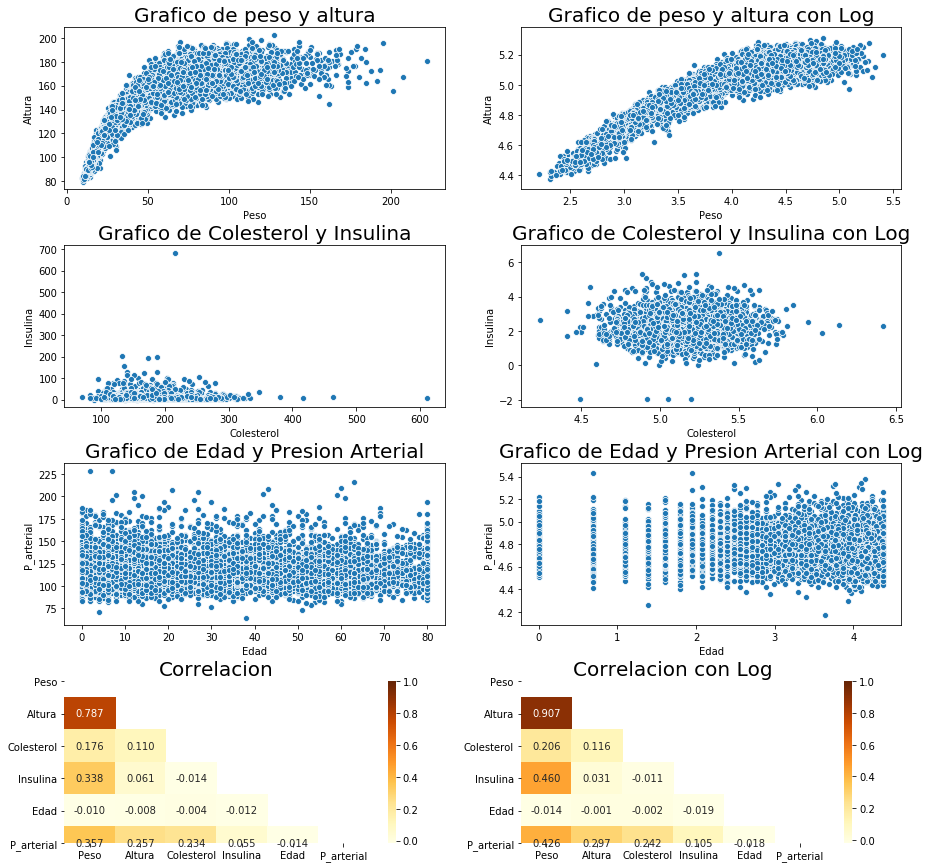

In [0]:
mediapres=presion_sanguinea_data[['BPXSY1','BPXSY2','BPXSY3']].mean(1)
data_corr=pd.DataFrame({'Peso':medidas_corporales_data['BMXWT'],'Altura':medidas_corporales_data['BMXHT'],'Colesterol':resultados_laboratorio_data['LBXTC'],'Insulina':resultados_laboratorio_data['LBXIN'],'Edad':demografia_data['RIDAGEYR'],'P_arterial':mediapres})

plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.35)

plt.subplot(4,2,1)
plt.title('Grafico de peso y altura',fontdict = {'fontsize' : 20})
sns.scatterplot(data_corr['Peso'],data_corr['Altura']);

plt.subplot(4,2,2)
plt.title('Grafico de peso y altura con Log',fontdict = {'fontsize' : 20})
sns.scatterplot(np.log(data_corr['Peso']),np.log(data_corr['Altura']));

plt.subplot(4,2,3)
plt.title('Grafico de Colesterol y Insulina',fontdict = {'fontsize' : 20})
sns.scatterplot(data_corr['Colesterol'],data_corr['Insulina']);

plt.subplot(4,2,4)
plt.title('Grafico de Colesterol y Insulina con Log',fontdict = {'fontsize' : 20})
sns.scatterplot(np.log(data_corr['Colesterol']),np.log(data_corr['Insulina']));

plt.subplot(4,2,5)
plt.title('Grafico de Edad y Presion Arterial',fontdict = {'fontsize' : 20})
sns.scatterplot(data_corr['Edad'],data_corr['P_arterial']);

plt.subplot(4,2,6)
plt.title('Grafico de Edad y Presion Arterial con Log',fontdict = {'fontsize' : 20})
sns.scatterplot(np.log(data_corr['Edad']),np.log(data_corr['P_arterial']));

plt.subplot(4,2,7)
plt.title('Correlacion',fontdict = {'fontsize' : 20})
mask = np.zeros_like(data_corr.corr(method='pearson'), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_corr.corr(method='pearson'),annot=True,fmt='.3f', mask=mask, cmap='YlOrBr');

plt.subplot(4,2,8)
plt.title('Correlacion con Log',fontdict = {'fontsize' : 20})
mask = np.zeros_like(data_corr.corr(method='pearson'), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(np.log(data_corr).corr(method='pearson'),annot=True,fmt='.3f', mask=mask, cmap='YlOrBr');

# 11) Determine cuál es la probabilidad de que una persona padezca hepatitis A. 


In [0]:
#Merge de todos los datasets y total_datos almecena el total de los datos
all_data=demografia_data.merge(medidas_corporales_data,on='SEQN').merge(presion_sanguinea_data,on='SEQN').merge(resultados_laboratorio_data,on='SEQN')
total_datos=len(all_data)

In [0]:
#Funcion para calulo de probabilidades
def probabilidades_df(df):
  result=round((df/total_datos*100),2)
  return result

In [0]:
tot_hepa=len(all_data[all_data['LBXHA']==1])
print(f'Del total {total_datos} que es la muestra, la probabilidad de que una persona padezca Hepatitis A es del: {probabilidades_df(tot_hepa)}%')

Del total 9813 que es la muestra, la probabilidad de que una persona padezca Hepatitis A es del: 49.03%


# 12) Determine cuál es la probabilidad de que una persona sea hombre, de raza hispana, pese entre 60 y 80 kg, con sobrepeso y tenga hepatitis A. 


In [0]:
H=len(all_data[(all_data['RIAGENDR']==1)&(all_data['RIDRETH1']<3)&((all_data['BMXWT']>=60) & (all_data['BMXWT']<=80))&(all_data['LBXHA']==1)&((all_data['BMXBMI']>=25)&(all_data['BMXBMI']<=30))])
print(f'Del total {total_datos} que es la muestra, la Probabilidad de que un hombre,\n de raza hispana que pese entre 60 y 80 Kg, con sobrepeso y tenga Hepatitis A es del: {probabilidades_df(H)}%')

Del total 9813 que es la muestra, la Probabilidad de que un hombre,
 de raza hispana que pese entre 60 y 80 Kg, con sobrepeso y tenga Hepatitis A es del: 1.43%


# 13) Determine cuál es la probabilidad de que una persona que ha vivido entre 10 a 15 años en US, este graduado de la universidad, casado y posea niveles de insulina superiores a 90. 


In [0]:
h_10_30=len(all_data[(all_data['DMDYRSUS']==4)&(all_data['DMDEDUC2']==5)&(all_data['DMDMARTL']==1)&(all_data['LBXIN']>90)])
print(f'Del total {total_datos} que es la muestra, la Probabilidad de una persona que ha vivido entre 10 a 15 años en US\n y este graduado de la universidad con niveles superiores a 90 de insulina es del: {probabilidades_df(h_10_30)}%')

Del total 9813 que es la muestra, la Probabilidad de una persona que ha vivido entre 10 a 15 años en US
 y este graduado de la universidad con niveles superiores a 90 de insulina es del: 0.0%


# 14) Determine cuál es la probabilidad de que una persona entre 30 y 40 años, de raza hispana, casado o divorciado, tenga un ingreso anual del hogar entre USD 15,000 y USD 35,000 que tenga clamidia.

In [0]:
plata=len(all_data[((all_data['RIDAGEYR']>=30)&(all_data['RIDAGEYR']<=40))&(all_data['RIDRETH1']<3)&((all_data['DMDMARTL']==1)|(all_data['DMDMARTL']==3))&((all_data['INDHHIN2'])>=4)&(all_data['INDHHIN2']<=6)&(all_data['URXUCL']==1)])
print(f'Del Total {total_datos} que es la muestra, la probabilidad de que una persona entre 30 y 40 años de raza hispana,\n casado o divorciado, que tenga un ingreso de 15,000 y 35,000 USD y tenga Clamidia es del: {probabilidades_df(plata)}%')

Del Total 9813 que es la muestra, la probabilidad de que una persona entre 30 y 40 años de raza hispana,
 casado o divorciado, que tenga un ingreso de 15,000 y 35,000 USD y tenga Clamidia es del: 0.0%
